## **1. Data Fetching and Storing**

In [4]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import os

import cv2

In [5]:
training_dataset_path = "E:/JupyNote/DL Mini Projects/Plant Disease Prediction/dataset/train"

In [6]:
no_of_images = 1000
images = []
labels = []

In [7]:
for directory in os.listdir(training_dataset_path):
    image_directory_path = os.path.join(training_dataset_path,directory)
    j = 0
    for image_name in os.listdir(image_directory_path):
        image_path = os.path.join(image_directory_path,image_name)
        img = cv2.imread(image_path)
        if img is None:
            continue
        img = cv2.resize(img, (128,128))
        images.append(img)
        labels.append(directory)
        j += 1
        if j == no_of_images:
            break

In [8]:
images = np.asarray(images)
labels = np.asarray(labels)

In [9]:
images = images / 255.0

In [7]:
print(images.shape)
print(labels.shape)

(38000, 128, 128, 3)
(38000,)


In [18]:
encoder = LabelEncoder()

In [19]:
labels = encoder.fit_transform(labels)

In [20]:
i = 0
label_encoder_dictionary = {}
for j in encoder.classes_:
    label_encoder_dictionary[i] = j
    i += 1

In [22]:
print(label_encoder_dictionary[0])

Apple___Apple_scab


Apple___Apple_scab


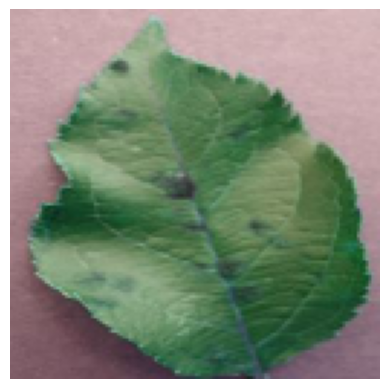

In [12]:
dict = 0
print(label_encoder_dictionary[dict])
index = np.where(labels == dict)[0][0]
plt.imshow(images[index])
plt.axis('off')
plt.show()

In [13]:
images, labels = shuffle(images, labels, random_state=20)

## **2. Building the CNN Model**

In [1]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras import Sequential, layers

In [15]:
no_of_classification_classes = 38

In [19]:
model = Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),

    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(2,2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(38, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 465,894 (1.78 MB)

 Trainable params: 464,934 (1.77 MB)

 Non-trainable params: 960 (3.75 KB)

In [20]:
model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## **3. Training the CNN Model**

In [21]:
history = model.fit(
    images,
    labels,
    validation_split=0.1,
    batch_size=32,
    epochs=10
)

Epoch 1/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 383s 354ms/step - accuracy: 0.4903 - loss: 1.8543 - val_accuracy: 0.7287 - val_loss: 1.0018
Epoch 2/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 373s 349ms/step - accuracy: 0.7282 - loss: 0.9474 - val_accuracy: 0.8468 - val_loss: 0.5461
Epoch 3/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 370s 346ms/step - accuracy: 0.8139 - loss: 0.6376 - val_accuracy: 0.8895 - val_loss: 0.3976
Epoch 4/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 369s 346ms/step - accuracy: 0.8637 - loss: 0.4694 - val_accuracy: 0.9211 - val_loss: 0.2814
Epoch 5/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 371s 347ms/step - accuracy: 0.8932 - loss: 0.3619 - val_accuracy: 0.9095 - val_loss: 0.3005
Epoch 6/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 373s 349ms/step - accuracy: 0.9151 - loss: 0.2907 - val_accuracy: 0.9374 - val_loss: 0.2243
Epoch 7/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 371s 347ms/step - accuracy: 0.9300 - loss: 0.2373 - val_accuracy: 0.9468 - val_loss: 0.1974
Epoch 8/10
1069/1069 ━━━━━━━━━━━━━━━━━━━━ 372s 348ms/step - ac

## **4. Saving the trained model for future use**

In [22]:
model.save('plant-disease-detection.keras')

## **5. Validating the model**

In [24]:
disease_detection_model = keras.models.load_model('plant-disease-detection.keras')

In [10]:
validation_dataset_path = "E:/JupyNote/DL Mini Projects/Plant Disease Prediction/dataset/valid"

In [11]:
no_of_images_for_validation = 100
validation_images = []
validation_labels = []

In [14]:
for directory in os.listdir(validation_dataset_path):
    validation_images_directory_path = os.path.join(validation_dataset_path, directory)
    i = 0
    for validation_images_name in os.listdir(validation_images_directory_path):
        validation_image_path = os.path.join(validation_images_directory_path,validation_images_name)
        validation_img = cv2.imread(validation_image_path)
        if validation_img is None:
            continue;
        validation_img = cv2.resize(validation_img, (128, 128))
        validation_images.append(validation_img)
        validation_labels.append(directory)
        i += 1
        if i == no_of_images_for_validation:
            break

In [16]:
validation_images = np.asarray(validation_images)
validation_labels = np.asarray(validation_labels)

In [17]:
validation_images = validation_images / 255.0

In [23]:
validation_labels = encoder.transform(validation_labels)

In [28]:
loss, accuracy = disease_detection_model.evaluate(validation_images, validation_labels)

119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9395 - loss: 0.1772


In [29]:
print(f'Accuracy on validation data is {accuracy * 100 :.2f}')

Accuracy on validation data is 93.95


## **6. Testing the model**

In [30]:
testing_dataset_path = "E:/JupyNote/DL Mini Projects/Plant Disease Prediction/dataset/test"

In [42]:
testing_images = []
testing_labels = []

In [43]:
for testing_images_name in os.listdir(testing_dataset_path):
    testing_image_path = os.path.join(testing_dataset_path,testing_images_name)
    testing_img = cv2.imread(testing_image_path)
    if testing_img is None:
        continue;
    testing_img = cv2.resize(testing_img, (128, 128))
    testing_images.append(testing_img)
    testing_labels.append(testing_images_name)

In [44]:
testing_images = np.asarray(testing_images)
testing_labels = np.asarray(testing_labels)

In [45]:
testing_images = testing_images / 255.0

In [58]:
for i in range(0,len(testing_images)):
    img = np.expand_dims(testing_images[i], axis=0)
    prediction = disease_detection_model.predict(img, verbose=False)
    print(label_encoder_dictionary[np.argmax(prediction[0])], ' -> ' ,testing_labels[i])

Apple___Cedar_apple_rust  ->  AppleCedarRust1.JPG
Apple___Cedar_apple_rust  ->  AppleCedarRust2.JPG
Apple___Cedar_apple_rust  ->  AppleCedarRust3.JPG
Apple___Cedar_apple_rust  ->  AppleCedarRust4.JPG
Grape___healthy  ->  AppleScab1.JPG
Apple___Apple_scab  ->  AppleScab2.JPG
Apple___Apple_scab  ->  AppleScab3.JPG
Corn_(maize)___Common_rust_  ->  CornCommonRust1.JPG
Corn_(maize)___Common_rust_  ->  CornCommonRust2.JPG
Corn_(maize)___Common_rust_  ->  CornCommonRust3.JPG
Potato___Early_blight  ->  PotatoEarlyBlight1.JPG
Potato___Early_blight  ->  PotatoEarlyBlight2.JPG
Soybean___healthy  ->  PotatoEarlyBlight3.JPG
Potato___Early_blight  ->  PotatoEarlyBlight4.JPG
Potato___Early_blight  ->  PotatoEarlyBlight5.JPG
Potato___healthy  ->  PotatoHealthy1.JPG
Potato___healthy  ->  PotatoHealthy2.JPG
Tomato___Early_blight  ->  TomatoEarlyBlight1.JPG
Tomato___Early_blight  ->  TomatoEarlyBlight2.JPG
Grape___Black_rot  ->  TomatoEarlyBlight3.JPG
Tomato___Early_blight  ->  TomatoEarlyBlight4.JPG
Tom